# Supervised Learning and K Nearest Neighbors Exercises

# Learning Objectives:

- Explain supervised learning and how it can be applied to regression and classification problems
- Apply K-Nearest Neighbor (KNN) algorithm for classification
- Apply Intel® Extension for Scikit-learn* to leverage underlying compute capabilities of hardware

# scikit-learn*

Frameworks provide structure that Data Scientists use to build code. Frameworks are more than just libraries, because in addition to callable code, frameworks influence how code is written.

A main virtue of using an optimized framework is that code runs faster. Code that runs faster is just generally more convenient but when we begin looking at applied data science and AI models, we can see more material benefits. Here you will see how optimization, particularly hyperparameter optimization can benefit more than just speed.

These exercises will demonstrate how to apply **the Intel® Extension for Scikit-learn*,** a seamless way to speed up your Scikit-learn application. The acceleration is achieved through the use of the Intel® oneAPI Data Analytics Library (oneDAL). Patching is the term used to extend scikit-learn with Intel optimizations and makes it a well-suited machine learning framework for dealing with real-life problems.

To get optimized versions of many Scikit-learn algorithms using a patch() approach consisting of adding these lines of code after importing sklearn:

- **from sklearnex import patch_sklearn**
- **patch_sklearn()**

## This exercise relies on installation of  Intel® Extension for Scikit-learn*

If you have not already done so, follow the instructions from Week 1 for instructions


## Introduction

We will be using customer churn data from the telecom industry for the first week's exercises. The data file is called
`Orange_Telecom_Churn_Data.csv`. We will load this data together, do some preprocessing, and use K-nearest neighbors to predict customer churn based on account characteristics.

In [ ]:
!pip install scikit-learn-intelex
from __future__ import print_function
import os
data_path = ['data']

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearnex import patch_sklearn
patch_sklearn()



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.8/131.8 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 MB 8.9 MB/s eta 0:00:00


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


## Step 1

* Begin by importing the data. Examine the columns and data.
* Notice that the data contains a state, area code, and phone number. Do you think these are good features to use when building a machine learning model? Why or why not?

We will not be using them, so they can be dropped from the data.

In [ ]:
import pandas as pd

# Import the data using the file path
filepath = 'Wine_Quality_Data.csv'
data = pd.read_csv(filepath)

In [ ]:
#Inspect the data
data.head().T


,0,1,2,3,4
fixed_acidity,7.4,7.8,7.8,11.2,7.4
volatile_acidity,0.7,0.88,0.76,0.28,0.7
citric_acid,0.0,0.0,0.04,0.56,0.0
residual_sugar,1.9,2.6,2.3,1.9,1.9
chlorides,0.076,0.098,0.092,0.075,0.076
free_sulfur_dioxide,11.0,25.0,15.0,17.0,11.0
total_sulfur_dioxide,34.0,67.0,54.0,60.0,34.0
density,0.9978,0.9968,0.997,0.998,0.9978
pH,3.51,3.2,3.26,3.16,3.51
sulphates,0.56,0.68,0.65,0.58,0.56


data.head(1) retrieves the first row of the DataFrame. The head function is typically used to quickly inspect the initial few rows of a DataFrame, with the argument 1 indicating the number of rows to return.

.T is used to transpose the output. Transposing swaps the rows and columns. This is particularly useful when you have many columns and want to view them as rows for better readability.

In [ ]:
# Remove extraneous columns
# data.drop(['state', 'phone_number', 'area_code'], axis=1, inplace=True)

This line removes the columns 'state', 'area_code', and 'phone_number' from the DataFrame.

* The drop method is used for this purpose, where the first argument is a list of column names to be removed.

* axis=1 specifies that columns should be dropped. (For dropping rows, you would use axis=0).

* inplace=True modifies the DataFrame in place. Without this, the drop method would return a new DataFrame with the specified columns removed, but data would remain unchanged.

In [ ]:
#Inspect the column names
data.columns


Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')

The line data.columns is used to retrieve the column names of the DataFrame data. This is a common operation in data analysis, especially when you're familiarizing yourself with a new dataset or have modified the dataset by adding, removing, or renaming columns.

## Step 2

* Notice that some of the columns are categorical data and some are floats. These features will need to be numerically encoded using one of the methods from the lecture.
* Finally, remember from the lecture that K-nearest neighbors requires scaled data. Scale the data using one of the scaling methods discussed in the lecture.

In [ ]:
#Preprocess the category data
lb = LabelBinarizer()

for col in ['color']:
  data[col] = lb.fit_transform(data[col])


LabelBinarizer is a preprocessing tool used to convert categorical data into a format that can be used by machine learning algorithms. It essentially transforms each category into a new column with binary values (0 or 1).

The code is iterating over a list of column names: ['intl_plan', 'voice_mail_plan', 'churned'].

For each of these columns, it applies the fit_transform method of the LabelBinarizer object lb.

fit_transform does two things:

* fit part learns the mapping from the original categories to binary values. For example, if 'intl_plan' has categories like 'yes' and 'no', it will learn to map 'yes' to 1 and 'no' to 0.
* transform part applies this mapping to the column, converting each entry into its corresponding binary value.

The transformed column then replaces the original column in the DataFrame data.

In [ ]:
# Mute the sklearn warning and scale the data
import warnings
warnings.filterwarnings('ignore', module= 'sklearn')

msc = MinMaxScaler()

data = pd.DataFrame(msc.fit_transform(data), columns= data.columns)

MinMaxScaler is a tool from the scikit-learn library used to scale features to a given range, often between 0 and 1.
* This line initializes the MinMaxScaler and assigns it to the variable msc.

msc.fit_transform(data) scales the data. The fit part computes the minimum and maximum values of each feature (column) to be used in scaling. The transform part scales the features of data from 0 to 1 based on these computed values.

The result of msc.fit_transform(data) is a NumPy array. This array is then used to create a new DataFrame.

pd.DataFrame(..., columns=data.columns) ensures that the new DataFrame has the same column names as the original data DataFrame.

This step is important as scaling is a common requirement for many machine learning algorithms, including KNN. It ensures that all features contribute equally to the result and improves the performance of distance-based algorithms.

## Step 3

* Separate the feature columns (everything except `churned`) from the label (`churned`). This will create two tables.
* Fit a K-nearest neighbors model with a value of `k=3` to this data and predict the outcome on the same data.

In [ ]:
# Get a list of all the columns that don't contain the label
x_cols = [x for x in data.columns if x != 'color']

# Split the data into two dataframes
x_data = data[x_cols]
y_data = data['color']


The first line creates a list comprehension to select all columns from the DataFrame data except the column named 'churned'.
* x_cols will therefore contain the names of all columns that are not the target variable ('churned'). In machine learning terminology, these are your features or predictors.

Next, X_data is created by selecting the columns listed in x_cols from the DataFrame data.
* This results in a DataFrame X_data that contains all the columns (features) that will be used for training the machine learning model, excluding the target variable.

Then we extract the column 'churned' from data and assigns it to y_data.
* y_data is the target variable for the model, the outcome you are trying to predict. In this case, it appears to represent whether a customer has churned.

In [ ]:
#Use KNN to train the model and then make a prediction
knn = KNeighborsClassifier(n_neighbors=3)

knn = knn.fit(x_data, y_data)

y_pred = knn.predict(x_data)

Here, KNeighborsClassifier is being used to create an instance of the KNN algorithm.
* n_neighbors=3 specifies that the algorithm should consider the 3 nearest neighbors for making predictions. This is a key parameter in KNN, determining how many neighboring points are used to classify a new point.

The fit method is used to train the KNN model on your dataset.
* X_data contains the features (independent variables) of your dataset, and y_data contains the target (dependent variable) you want to predict.
* By fitting the model to your data, the algorithm is essentially learning from the existing data points to make future predictions.

After the model is trained, the predict method is used to make predictions on the same dataset (X_data).
* The output y_pred contains the predicted values for the target variable based on the learned patterns in the training phase.
* It’s important to note that in practice, predictions are usually made on a separate testing dataset, not on the same dataset used for training.
* Predicting on the training data can give overly optimistic estimates of model performance due to overfitting.

## Step 4

Ways to measure error haven't been discussed in class yet, but accuracy is an easy one to understand--it is simply the percent of labels that were correctly predicted (either true or false).

* Write a function to calculate accuracy using the actual and predicted labels.
* Using the function, calculate the accuracy of this K-nearest neighbors model on the data.

In [ ]:
# Function to calculate the % of values that were correctly predicted

def accuracy(real, predict):
    return sum(real == predict) / float(real.shape[0])

* Function Parameters: The function takes two parameters, real and predict. real represents the actual labels (true values), and predict represents the predicted labels from the model.
* Comparing Predictions to Actual Values: The expression real == predict compares the two arrays element-wise and creates a new array of boolean values (True where the predictions match the actual values, and False otherwise).
* Summing Correct Predictions: sum(real == predict) sums up these boolean values, effectively counting the number of correct predictions (since True is treated as 1 and False as 0 in Python).
* Calculating the Accuracy: This sum is then divided by real.shape[0], which is the total number of instances in the dataset (the number of rows in the real array). The result is the accuracy of the model, which is the proportion of correct predictions over the total number of predictions.
Returning the Result: The function then returns this accuracy as a float value.

In [ ]:
#Print the accuracy
print(accuracy(y_data, y_pred))

0.995844235801139


This function call calculates the accuracy of your model's predictions. It does this by comparing each predicted label (y_pred) with the corresponding actual label (y_data).

### Task 1:

Try training the model with a K value of 1 and print the accuracy

In [ ]:
#Task 1
knn = KNeighborsClassifier(n_neighbors=3)

knn = knn.fit(x_data, y_data)

y_pred = knn.predict(x_data)

#Print the accuracy
print(accuracy(y_data, y_pred))

0.995844235801139


* Why did changing the K value to 1 result in this accuracy?
* Is there an issue with this?

## Step 5

* Fit the K-nearest neighbors model again with `n_neighbors=3` but this time use distance for the weights. Calculate the accuracy using the function you created above.
* Fit another K-nearest neighbors model. This time use uniform weights but set the power parameter for the Minkowski distance metric to be 1 (`p=1`) i.e. Manhattan Distance.

When weighted distances are used for part 1 of this question, a value of 1.0 should be returned for the accuracy. Why do you think this is? *Hint:* we are predicting on the data and with KNN the model *is* the data. We will learn how to avoid this pitfall in the next lecture.

In [ ]:
#
#Task 1.5
#

knn = KNeighborsClassifier(n_neighbors=3, weights='distance')

knn = knn.fit(x_data, y_data)

y_pred = knn.predict(x_data)

#Print the accuracy
print(accuracy(y_data, y_pred))

0.9996921656148992


This initializes a KNN classifier with n_neighbors=3, which means the classifier considers the 3 nearest neighbors for making predictions.
* The weights='distance' parameter configures the classifier to weigh the contributions of the neighbors by the inverse of their distance. This means closer neighbors will have a greater influence on the classification than further ones.

The fit method is used to train the KNN model on your dataset (X_data as features and y_data as the target variable).

After training, the predict method is used to make predictions on the dataset X_data.
* The predictions are stored in y_pred.

The accuracy function you defined earlier is used to calculate the model's accuracy, with y_data as the actual labels and y_pred as the predicted labels.
* The calculated accuracy is then printed.

In [ ]:
#Task 2
#Train the model with a K value (n_neighbors) of 5 and a Minkowski value (p) of 2
knn = KNeighborsClassifier(n_neighbors=5, p=2)

knn = knn.fit(x_data, y_data)

y_pred = knn.predict(x_data)

#Print the accuracy
print(accuracy(y_data, y_pred))


0.9941511466830845


p=2: This parameter determines the power parameter for the Minkowski metric, which is the distance metric used by KNN. When p=2, the Minkowski metric becomes equivalent to the Euclidean distance.
* The Euclidean distance is the most common choice and is effective in many cases. It's calculated as the square root of the sum of the squared differences between corresponding elements of the vectors.

In [ ]:
#Task 3
#Train the modeul with a K value (n_neighbors) of 5 and a Minkowski value (p) of 1
knn = KNeighborsClassifier(n_neighbors=5, p=1)

knn = knn.fit(x_data, y_data)

y_pred = knn.predict(x_data)

#Print the accuracy
print(accuracy(y_data, y_pred))

0.9956903186085886


p=1: This parameter changes the power parameter for the Minkowski metric, which is the distance metric used by KNN. When p=1, the Minkowski metric becomes equivalent to the Manhattan distance (also known as the L1 norm or the city block distance).
* The Manhattan distance between two points is the sum of the absolute differences of their Cartesian coordinates. It is a different way of measuring distance compared to the Euclidean distance (which is used when p=2).

The choice between Manhattan distance (p=1) and Euclidean distance (p=2) depends on the nature of your data and the specific problem you're addressing. Manhattan distance can be more effective in higher-dimensional spaces or in cases where the Euclidean distance can be inflated by outlier values. It's also a common choice for sparse data sets

## Step 6

* Fit a K-nearest neighbors model using values of `k` (`n_neighbors`) ranging from 1 to 20. Use uniform weights (the default). The coefficient for the Minkowski distance (`p`) can be set to either 1 or 2--just be consistent. Store the accuracy and the value of `k` used from each of these fits in a list or dictionary.
* Plot (or view the table of) the `accuracy` vs `k`. What do you notice happens when `k=1`? Why do you think this is? *Hint:* it's for the same reason discussed above.

In [ ]:
# Fit the K-nearest neighbors model with different values of k
# Store the accuracy measurement for each k

score_list = list()

for k in range(1,21):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn = knn.fit(x_data, y_data)
  y_pred = knn.predict(x_data)
  score = accuracy(y_data, y_pred)
  score_list.append((k, score))
  print(score)

score_df = pd.DataFrame(score_list, columns= ['k', 'accuracy'])


0.9996921656148992
0.9964599045713406
0.995844235801139
0.9950746498383869
0.9941511466830845
0.9927658919501309
0.9926119747575805
0.9910728028320763
0.99245805756503
0.9918423887948283
0.9923041403724796
0.9918423887948283
0.9919963059873788
0.9915345544097276
0.9918423887948283
0.991688471602278
0.9909188856395259
0.9913806372171772
0.9913806372171772
0.9913806372171772


In [ ]:
# Import libraries to make the plot

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

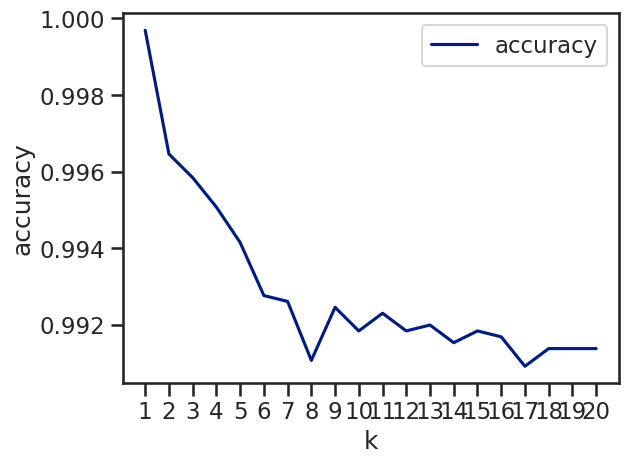

In [ ]:
#Seaborn

sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = score_df.set_index('k').plot()
ax.set(xlabel= 'k', ylabel= 'accuracy')
ax.set_xticks(range(1,21))


In [ ]:
#matplotlib



In [ ]:
#Print the score data frame

## Analysing the results

Accuracy at k=1:

* When k=1, the accuracy is 1.0000 (or 100%). This means that the model perfectly classified all instances in the training set. However, this is a typical sign of overfitting, especially in KNN. When k=1, the model simply labels a new instance with the label of its nearest neighbor, which can be highly sensitive to noise in the dataset.

Fluctuations in Accuracy:

* As k increases from 1 to 20, the accuracy fluctuates, but it's generally lower than when k=1. This fluctuation is normal and indicates how sensitive the KNN model can be to the choice of k.
The highest accuracies after k=1 are observed at k=3, k=5, and k=7. These might be considered as potential optimal values for k in terms of accuracy, but they are still significantly lower than the perfect accuracy at k=1, reinforcing the notion that the model with k=1 is overfitting.

Decreasing Trend in Accuracy:

* There is a general decreasing trend in accuracy as k increases. This could indicate that incorporating more neighbors leads to more 'noise' in the classification decision, or it could reflect that the true decision boundary is more complex than what can be captured by considering too many neighbors.

Best Value of k:

* The 'best' value of k would balance between avoiding overfitting (which is clearly happening at k=1) and maintaining high accuracy. Based on these results, k=3, k=5, or k=7 could be good candidates. The exact choice might depend on additional factors, like the complexity of the data, the presence of noise, and the specific requirements of the application.

Evaluation Method:

* It's important to note that these results are based on training and testing on the same dataset. In a practical scenario, you would use a separate test set (or cross-validation) to evaluate the model. This is because evaluating on the training set can give overly optimistic estimates of model performance due to the model's familiarity with the data.